In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random as rd
import math 
from bokeh.plotting import figure
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import matplotlib
%matplotlib inline

In [3]:
#ucitavamo .csv fajl sa genskim ekspresijama
data = pd.read_csv('data_new.csv', '\t')

#brisemo nedostajuce vrednosti
data = data.dropna()

cols = list(data)

#za posebne fajlove, kada je prva kolona npr identifikator gena, 
#pa necemo da je uzimamo u obzir
#data = data[cols[1:]]

data = data.reset_index(drop=True)

#odredjivanje dimenzija matrice, odnosno dataframe-a
shape = data.shape
num_attributes = shape[1]
num_data = shape[0]

cols = list(data)
cols.append('cluster')

num_data
num_attributes
num_data

data

,x,y
0,1.3,1.1
1,1.3,0.2
2,0.6,2.8
3,3.0,3.2
4,1.2,0.7
5,1.4,1.6
6,1.2,1.0
7,1.2,1.1
8,0.6,1.5
9,1.8,2.6


In [6]:
columns = []
for col in data.columns:
    columns.append(data[col].values)

##trazimo minimum i maksimum u svakoj koloni da bismo znali u kom opsegu mozemo da generisemo
##pocetne centre
column_max_array = []
column_min_array = []

for i in columns:
    #kastovanje iz numpy float64 tipa u python float tip
    max_in_column = float(i.max())
    min_in_column = float(i.min())
    column_max_array.append(max_in_column)
    column_min_array.append(min_in_column)
    
#broj klastera, napraviti da bude parametar
num_of_clusters = 2

#random biranje pocetnih centara, tako da koordinate budu u opsegu minimalne i 
#maksimalne vrednosti za taj atribut
array_of_center_arrays = []

for i in range(0, num_of_clusters):
    center_array = []
    for k in range (0, len(column_max_array)):
        min_value = int(column_min_array[k])
        max_value = int(column_max_array[k])
        random_coordinate = rd.randint(min_value, max_value)
        center_array.append(random_coordinate)
    array_of_center_arrays.append(center_array)

array_of_center_arrays

[[3, 2], [1, 0]]

In [7]:
##################GLAVNI DEO, EXPECTATION MAXIMIZATION ALGORITAM#################

#inicijalizacija tzv "skrivene" matrice 
hidden_matrix = np.zeros([num_of_clusters,num_data])


#parametar beta koji se koristi pri racunanju vrednosti skrivene matrice
beta = 2.7

for param in range(0, 20):
    
    data_points_array = []
    
    #########################KORAK od centara do klastera#############################
    for index, row in data.iterrows():
        
        print ('Iteracija ' + str(index))
        #racunamo za svaku tacku rastojanje do svih centara
        point = data.ix[index].values
        
        #ispisi su za debagovanje
        print ('Tacka: ' + str(point))

        point_center_distance_array = []
        data_points_array.append(point)

        for center in array_of_center_arrays:
            #prvo racunamo obicno rastojanje izmedju centra i tacke
            distance = 0
            for p in range(0, len(point)):
                distance = distance + (point[p]-center[p])*(point[p]-center[p])

            print ('Centar ' + str(center) + ' rastojanje ' + str(p) + ' ' + str(point) + '=' + str(distance))

            #a zatim racunamo vrednost partition funkcije po kojoj formiramo skrivenu matricu
            partition_function = math.exp(math.sqrt(distance) * (-beta)) 

            print ('Centar ' + str(center) + ' novo rastojanje ' + str(p) + ' ' + str(point) + '=' + str(partition_function))

            point_center_distance_array.append(partition_function) 

        sum_point_center_distance = sum(point_center_distance_array)

        print ('Partition function' + str(point_center_distance_array))
        print ('Sume rastojanja centara od tacke ' + str(sum_point_center_distance))

        for num_centers in range(0, num_of_clusters):
            hidden_matrix[num_centers,index] = point_center_distance_array[num_centers]/sum_point_center_distance
        print ('Hidden matrix: ' + str(hidden_matrix))
        

    ####################KORAK od klastera do novih centara########################
    
    array_of_center_arrays = []
    new_coordinate_of_center_i = 0

    print ('Tacke: ' + str(data_points_array))
    for i in range (0, num_of_clusters):
        new_center = []

        sum_of_i_row = sum(hidden_matrix[i])
        
        #racunanje novih koordinata centara na osnovu skrivene matrice
        for num_coord in range(0, num_attributes):
            new_coordinate_of_center_i = 0
            for dp in range(0, len(data_points_array)):
                print (str(hidden_matrix[i, dp]) + ' ' + str(data_points_array[dp][num_coord]))
                new_coordinate_of_center_i += (hidden_matrix[i, dp] * data_points_array[dp][num_coord])

            new_coordinate_of_center_i = new_coordinate_of_center_i/sum_of_i_row
            new_center.append(new_coordinate_of_center_i)   

        array_of_center_arrays.append(new_center)

    print ('Novi centri' + str(array_of_center_arrays))
    
        

Iteracija 0
Tacka: [ 1.3  1.1]
Centar [3, 2] rastojanje 1 [ 1.3  1.1]=3.7
Centar [3, 2] novo rastojanje 1 [ 1.3  1.1]=0.005552240735088601
Centar [1, 0] rastojanje 1 [ 1.3  1.1]=1.3
Centar [1, 0] novo rastojanje 1 [ 1.3  1.1]=0.04602946022709086
Partition function[0.005552240735088601, 0.04602946022709086]
Sume rastojanja centara od tacke 0.05158170096217946
Hidden matrix: [[ 0.10763974  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.89236026  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]
Iteracija 1
Tacka: [ 1.3  0.2]
Centar [3, 2] rastojanje 1 [ 1.3  0.2]=6.13
Centar [3, 2] novo rastojanje 1 [ 1.3  0.2]=0.0012496572844556107
Centar [1, 0] rastojanje 1 [ 1.3  0.2]=0.13
Centar [1, 0] novo rastojanje 1 [ 1.3  0.2]=0.3777590031945408
Partition function[0.0012496572844556107, 0.3777590031945408]
Sume ra

In [8]:
#####################DODELJIVANJE TACAKA KLASTERIMA###################

#inicijalizacija klastera
data_cluster = {}

for i in range (0, len(hidden_matrix[0])):
    hidden_matrix_column = hidden_matrix[:,i]
    max_hidden_matrix_column = hidden_matrix_column.argmax()
    key = max_hidden_matrix_column
    if key in data_cluster.keys():
        data_cluster[key].append(data_points_array[i])
    else:
        data_cluster[key] = []
        data_cluster[key].append(data_points_array[i])

print(data_cluster)

data_points_array
array_of_center_arrays

{1: [array([ 1.3,  1.1]), array([ 1.3,  0.2]), array([ 1.2,  0.7]), array([ 1.4,  1.6]), array([ 1.2,  1. ]), array([ 1.2,  1.1]), array([ 0.6,  1.5]), array([ 1.2,  1.3]), array([ 1.2,  1. ]), array([ 0. ,  1.9])], 0: [array([ 0.6,  2.8]), array([ 3. ,  3.2]), array([ 1.8,  2.6])]}


[[1.662117332412848, 2.6231198734172123],
 [1.07544093527931, 1.1478764640967085]]

In [9]:
dataframe = pd.DataFrame(list(data_cluster.items()), columns=['Center','Points'])
dataframe

,Center,Points
0,1,"[[1.3, 1.1], [1.3, 0.2], [1.2, 0.7], [1.4, 1.6..."
1,0,"[[0.6, 2.8], [3.0, 3.2], [1.8, 2.6]]"


In [10]:
################FORMIRANJE NOVOG DATAFRAME-a SA INFORMACIJOM O KLASTERU

new_dataframe = pd.DataFrame(columns=cols)

index_data_points = -1

for index, row in dataframe.iterrows():
    center = row.values[0]
    array_of_points = row.values[1]
    for i in array_of_points:
        index_data_points += 1
        for j in range (0, len(i)):
            point = []
            new_dataframe.set_value(index_data_points, cols[j], i[j])
            new_dataframe.set_value(index_data_points, 'cluster', center)


data
new_dataframe

,x,y,cluster
0,1.3,1.1,1
1,1.3,0.2,1
2,1.2,0.7,1
3,1.4,1.6,1
4,1.2,1,1
5,1.2,1.1,1
6,0.6,1.5,1
7,1.2,1.3,1
8,1.2,1,1
9,0,1.9,1


/Users/milicakojicic/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/milicakojicic/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/milicakojicic/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/milicakojicic/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the s

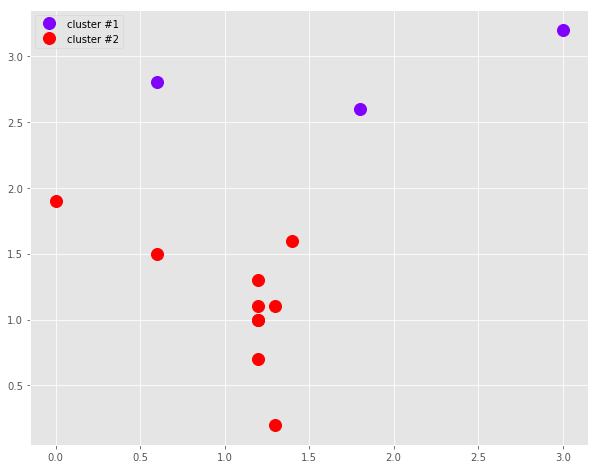

In [11]:
######################PRIKAZIVANJE REZULTATA#################

colors = matplotlib.cm.rainbow(np.linspace(0, 1, num_of_clusters))
plt.style.use('ggplot')
    
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_prop_cycle(color=colors)
ax.margins(0.05)

p = figure(x_axis_label='Component A', y_axis_label='Component B')
    
if (num_attributes>2):
    
    #redukcija dimenzionalnosti
    pca = PCA(n_components=2)
    pca.fit(new_dataframe[cols[:-1]].transpose())
    
    low_dimensional_frame = pd.DataFrame(pca.components_.T, columns=['component_a', 'component_b'])
    low_dimensional_frame['cluster'] = new_dataframe['cluster']
            
    for i in range(0,num_of_clusters):
        cluster_variable = low_dimensional_frame[low_dimensional_frame.cluster == i]
        p.circle(x=cluster_variable['component_a'], y=cluster_variable['component_b'], color=colors[i], size=10, alpha=0.8)
    
    groups = low_dimensional_frame.groupby('cluster')

    for name, group in groups:
        name = 'cluster #' + str(int(name)+1)
        ax.plot(group.component_a, group.component_b, marker='o', linestyle='', ms=12, label=name)
    ax.legend(numpoints=1, loc='upper left')

    plt.show()
    
else:
        
    for i in range(0,num_of_clusters):
        cluster_variable = new_dataframe[new_dataframe.cluster == i]
        p.circle(x=cluster_variable[cols[0]], y=cluster_variable[cols[1]], color=colors[i], size=10, alpha=0.8)
   
    groups = new_dataframe.groupby('cluster')
    
    for name, group in groups:
        name = 'cluster #' + str(int(name)+1)
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
    ax.legend(numpoints=1, loc='upper left')

    plt.show()
